In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('/content/ushape.csv', header=None)
df.columns = ['X','Y','class']
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [50]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

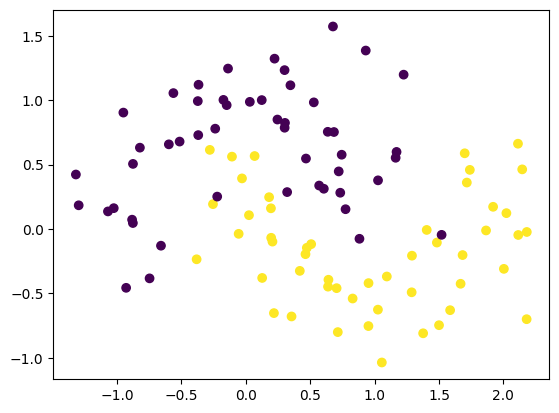

In [51]:
plt.scatter(X[:,0],X[:,1],c = y)

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [53]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

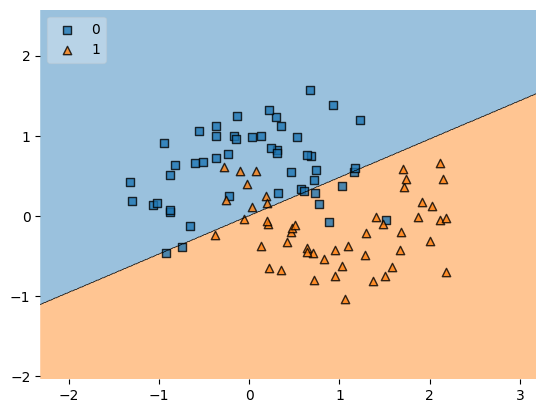

In [54]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype('int'),clf,legend = 2)

In [55]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring = 'accuracy',cv = 10))

np.float64(0.8300000000000001)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias = False)
X_trf = poly.fit_transform(X)

In [57]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring = 'accuracy',cv = 10))

np.float64(0.9)

In [58]:
def plot_decision_boundary(X,y,degree = 1):
  poly = PolynomialFeatures(degree = degree)
  X_trf = poly.fit_transform(X)
  clf = LogisticRegression()
  clf.fit(X_trf,y)

  accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring = 'accuracy',cv = 10))
  a = np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step = 0.01)
  b = np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step = 0.01)

  XX,YY = np.meshgrid(a,b)
  input_array = np.array([XX.ravel(),YY.ravel()]).T

  labels = clf.predict(poly.transform(input_array))

  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha = 0.5)

  plt.scatter(X[:,0],X[:,1],c = y)
  plt.title('Degree = {},accuracy is {}'.format(degree,np.round(accuracy,4)))


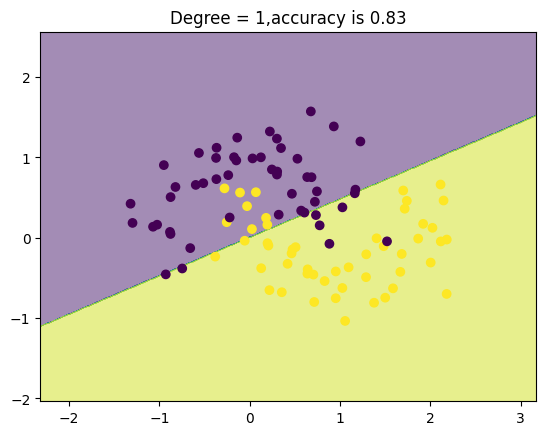

In [59]:
plot_decision_boundary(X,y)

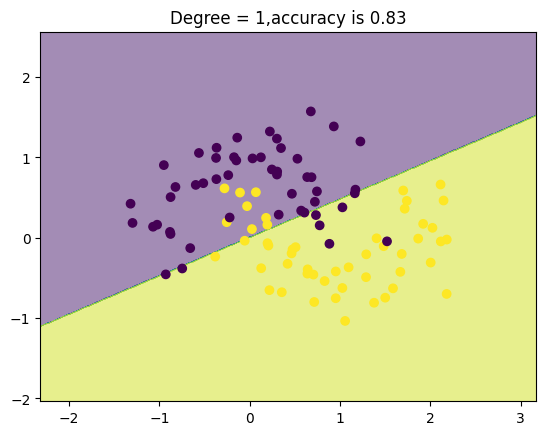

In [60]:
plot_decision_boundary(X,y,degree=1)

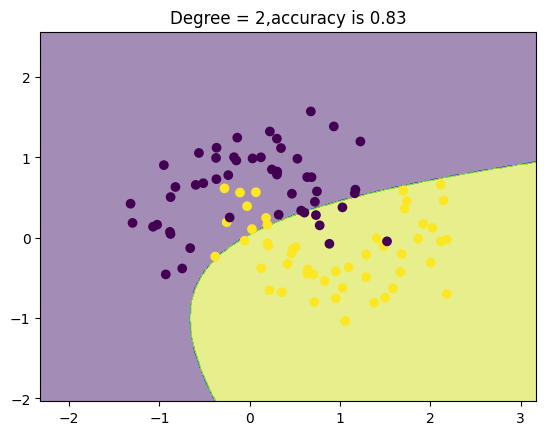

In [61]:
plot_decision_boundary(X,y,degree=2)

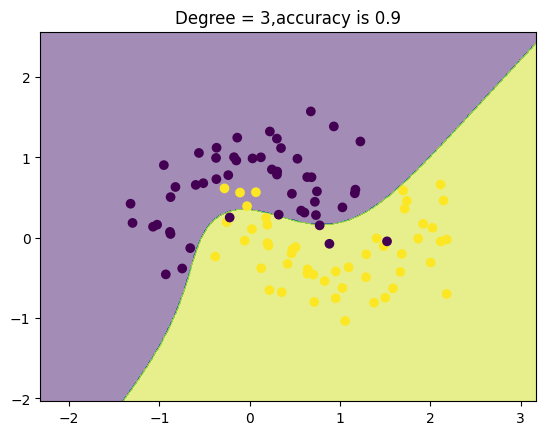

In [62]:
plot_decision_boundary(X,y,degree=3)

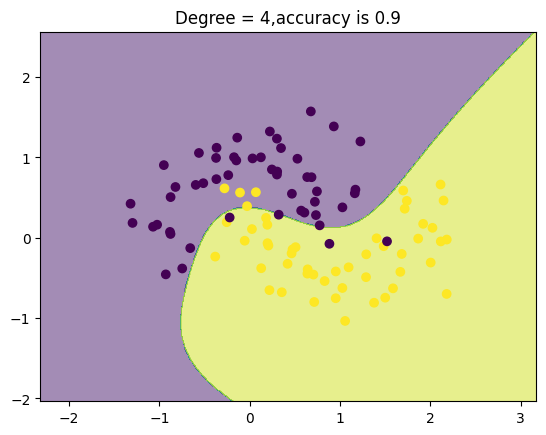

In [63]:
plot_decision_boundary(X,y,degree=4)

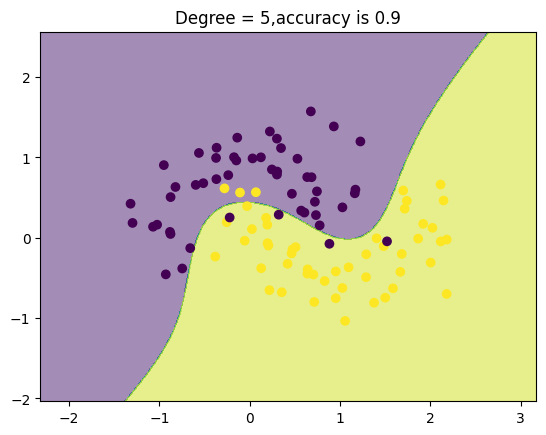

In [64]:
plot_decision_boundary(X,y,degree=5)

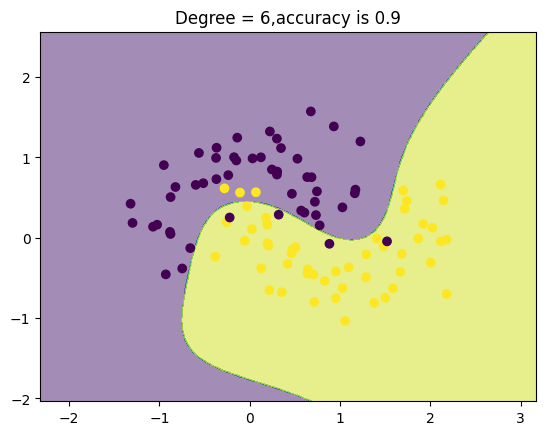

In [65]:
plot_decision_boundary(X,y,degree=6)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

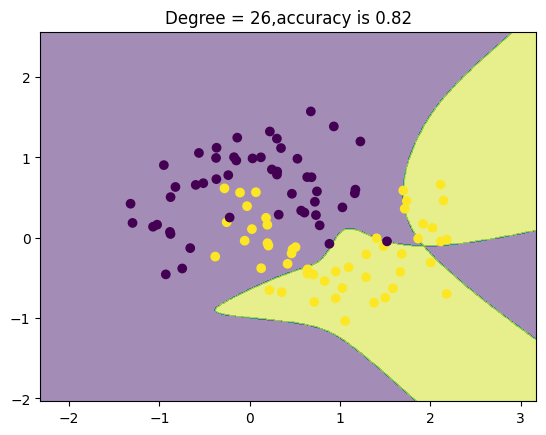

In [66]:
plot_decision_boundary(X,y,degree=26)